
# Project: Investigating The Movie Database (TMDb) Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

The dataset I have chosen for further analyze is the The Movie Database(TMDb) movie dataset collected from the aformentioned website. This particular dataset contains information on 10,000 movies. Some of the information contained is the original_title, budget, revenue, runtime, directors, and cast to name a few.

**Questions to ask**
1. What movies brought in the highest and lowest amount of revenue?
2. What movies required the highest and lowest amount of budget to produce the film?
3. Which movies were the most and least profitable?
4. What genres are the profitable?
5. What is the typical runtime for a movie?


In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

After comparing the questions posed in the introduction to the dataset, we will be keeping the data that is relevant to answering those questions. This will allow the calculated data to be displayed in easy to read manner. 

### General Properties

In [3]:
# Importing the tmd-movies.csv file and saving it as a variable
tmdb_moviesdata = pd.read_csv('tmdb-movies.csv')

# Displaying the first few rows of the data with the headers/column names
tmdb_moviesdata.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Looking at the overview picture of the first few lines of data for the movies there is a quick thing to note.
1. For the columns where there is a monetary value (i.e. budget, revenue) there is no indication of what currency is being used. For the purpose of this project we shall assume the currency used is USD.

### Data Cleaning (Replace this with more specific notes!)

**Important observations** 
1. We need to remove unused columns that will not be needed in the analysis like id, vote_count, homepage, etc.
2. If there are any duplicates we will need to remove them.
3. If the recorded value in the columns budget or revenue is a 0, we will be removing those rows as we are comparing budget and revenue. 
4. Updating the release date column to the date format.
5. Changing the format of the budget and revenue columns from float to integers.
6. Replacing any rows that have a zero in the runtime column to NAN.


### Deleting Unnecessary Columns
 Here is a list of the unncessary columns:
    <li> id                   
    <li> imdb_id
    <li> popularity
    <li> homepage                   
    <li> tagline
    <li> overview
    <li> keywords
    <li> production_companies                  
    <li> vote_count
    <li> vote_average
    <li> budget_adj                 
    <li> revenue_adj

In [4]:
# Create a list of columns that will be deleted
delete_columns = ['id','imdb_id','popularity','homepage','tagline','overview','production_companies',
                  'vote_count','vote_average','budget_adj','revenue_adj','keywords']

# Actually removing columns from the dataset
tmdb_moviesdata = tmdb_moviesdata.drop(delete_columns,1)

# Verifying the columns were removed from the dataset
tmdb_moviesdata.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


### Removing Duplicates

 We must check to see how many entries there are in the dataset.

In [5]:
rows, col = tmdb_moviesdata.shape
#You must account for the header row, so we will reduce the count by 1.
print('There are {} total movies and {} corresponding columns.'.format(rows-1, col))

There are 10865 total movies and 9 corresponding columns.


Now that we know the total number of movies entries, we will remove any potential duplicates.

In [6]:
tmdb_moviesdata.drop_duplicates(keep ='first', inplace=True)
rows, col = tmdb_moviesdata.shape

print('There are now {} total movies and {} corresponding columns.'.format(rows-1, col))

There are now 10864 total movies and 9 corresponding columns.


### Removing Entries With a 0 Dollar Amount in Revenue or Budget

In [7]:
# Create a seperate list of which includes the revenue and budget column
temp_list=['budget', 'revenue']

#First we will change the 0 value to a NaN value in the temporary list
tmdb_moviesdata[temp_list] = tmdb_moviesdata[temp_list].replace(0, np.NAN)

#Then we will remove all rows that has a NaN value in temporary list
tmdb_moviesdata.dropna(subset = temp_list, inplace = True)

rows, col = tmdb_moviesdata.shape
print('After removing the entries that met the criteria, we now have {} movies.'.format(rows-1))

After removing the entries that met the criteria, we now have 3853 movies.


### Updating the Release Date Column Format

In [8]:
tmdb_moviesdata.release_date = pd.to_datetime(tmdb_moviesdata['release_date'])

In [9]:
# Verifying that the release date has changed from the MM/DD/YY format to the YYYY-MM-DD format.
tmdb_moviesdata.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


### Altering the format of the budget and revenue columns from float to integers.

In [10]:
# First we must check the data type of the entire dataset.
tmdb_moviesdata.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
new_type=['budget', 'revenue']

#changing the data type
tmdb_moviesdata[new_type]=tmdb_moviesdata[new_type].applymap(np.int64)

#verifying the datatypes have changed
tmdb_moviesdata.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

### Replacing any rows that have a zero in the runtime column to NAN

In [12]:
#Replacing 0 with NaN from the runtime column
tmdb_moviesdata['runtime'] =tmdb_moviesdata['runtime'].replace(0, np.NAN)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  What movies brought in the highest and lowest amount of revenue?

In [13]:
import pprint

#defining the function
def calculate(column):
    #for highest earned revenue
    highest= tmdb_moviesdata[column].idxmax()
    highest_info=pd.DataFrame(tmdb_moviesdata.loc[highest])
    
    #for lowest earned revenue
    lowest= tmdb_moviesdata[column].idxmin()
    lowest_info=pd.DataFrame(tmdb_moviesdata.loc[lowest])
    
    #Placing the highest and lowest movies in one table
    info=pd.concat([highest_info, lowest_info], axis=1)
    
    return info

#calling the function
calculate('revenue')


,1386,5067
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


>Entry number 1386 _Avatar_ had the highest revenue which was 2781505847 dollars.

>Entry number 5067 _Shattered Glass_ had the lowest revenue which was 2 dollars.

### Research Question 2 : What movies required the highest and lowest amount of budget to produce the film?

In [14]:
# we will reuse the same calculate(column) function 
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


>Entry number 2244 _The Warrior's Way_ had the highest budget which was 425000000 dollars.

>Entry number 2618 _Lost & Found_ had the lowest budget which was 1 dollar.

### Research Question 3:  Which movies were the most and least profitable?

In [15]:
# We will need to include a new column which will have profits which is a formula.
tmdb_moviesdata.insert(2,'profits',tmdb_moviesdata['revenue']-tmdb_moviesdata['budget'])

#Verifying the new column has been entered
tmdb_moviesdata.head()

,budget,revenue,profits,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2015


### Research Question 4: What genres are the most profitable?

> We must first decide what is considered to be a profitable movie.
> We will make the threshold to be considered a profitable movie to be at or above 65 million dollars.

In [16]:
#We will create the threshold
profitable_data = tmdb_moviesdata[tmdb_moviesdata['profits'] >= 65000000]

#How many movies meet this criteria
len(profitable_data)

1130

The number listed above represents the total number of movies that are considered profitable.

In [17]:
# the function which will take any column as argument
def profitdata(column):
    # will take a column that has '|', and separate the string by '|'
    profitdata = profitable_data[column].str.cat(sep = '|')
    
    #giving pandas series and stores the values individually
    profitdata = pd.Series(profitdata.split('|'))
    
    # the data is arranged in a descending order
    count = profitdata.value_counts(ascending = False)
    
    return count

In [18]:
#variable to store the retured value
count = profitdata('genres')
#shows what the top genres where movies bring in the most profit
count.head()

Comedy       409
Action       404
Drama        393
Adventure    336
Thriller     335
dtype: int64

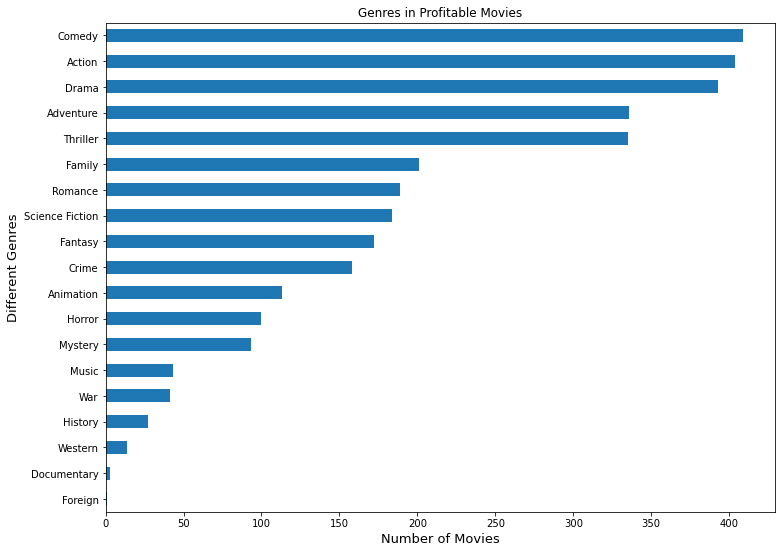

In [19]:
#Each bar will be in descending order from top to bottom.
count.sort_values(ascending = True, inplace = True)
bargraph = count.plot.barh()

#title of graph
bargraph.set(title = 'Genres in Profitable Movies')

#axis labels
bargraph.set_xlabel('Number of Movies', color = 'black', fontsize = '13')
bargraph.set_ylabel('Different Genres', color = 'black', fontsize = '13')

#graph size
bargraph.figure.set_size_inches(12, 9)

#will show the graph
plt.show()

Based on the graph we can see there are a lot more movies deemed "profitable" in the Comedy, Action, and Drama categories. So it is more likely that a movie that is considered a Comedy, Action, Drama, Adventure, or Thriller will have a better chance to bring in more that 65 million dollars in profit than a western or documentary.

### Research Question 5: What is the typical runtime of a movie?

In [20]:
# creating a function to calculate average runtime
def average_runtime(column):
    return tmdb_moviesdata[column].mean()

In [21]:
# executing the function
average_runtime('runtime')

109.22029060716139

In [22]:
#Getting an overall description of the movies runtimes
tmdb_moviesdata['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

As you can see the average runtime for the movies in the dataset is 109 minutes while the lowest runtime a movie had was 15 minutes. The longest runtime was 338 minutes. We will create a visual to show how these different data points line up.

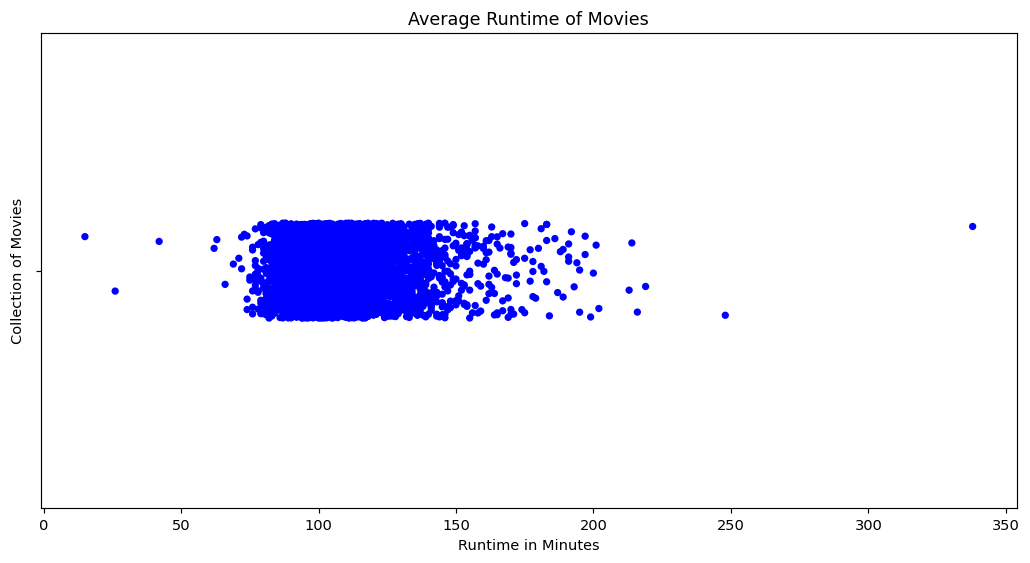

In [29]:
plt.figure(figsize=(12,6), dpi = 105)

#using seaborn to generate the plot
sns.stripplot(x= tmdb_moviesdata['runtime'], color = 'blue')
plt.ylabel('Collection of Movies')
plt.xlabel ('Runtime in Minutes')
plt.title('Average Runtime of Movies')
#showcasing the graph
plt.show()


Based on this graph, it is noticeable that a majority of movies overlap with a runtime between 75 minutes to around the 150 minutes tick. There are a few movie outliers that skew the data such as a couple of movies that are less than 50 minutes long to another movie that is between 300 and 350 minutes. 

<a id='conclusions'></a>
## Conclusions

 As you can see after analyzing this dataset a majority of the movies deemed profitable or over 65 million dollars in profit are in the genres: comedy, action, drama, adventure, and thriller. 

A majority of the movie runtimes range from 95 minutes to 150 minutes then occurrences decrease significantly outside of this range.


### Limitations 

We have used the TMBd Movies dataset for our analysis and focused on genre, revenue, and runtime. Our analysis is limited to only the provided dataset. It is well known that there are more than 10,000 movies released that have not been included in this dataset.

There is no currency conversion is considered during this analysis. An example of this is some movie revenue may be in Euros or Pesos and not US Dollars.